In [1]:
from glob import glob
from script_converter import get_transformation_matrix
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pydicom

import numpy as np

from rt_utils.image_helper import apply_transformation_to_3d_points

In [2]:
mat = get_transformation_matrix('example/Prostatex-0000/t2_tse_tra/')

In [3]:
dcm = pydicom.dcmread('example/Prostatex-0000/t2_tse_tra/IM-0001-0001.dcm')
h, w = dcm.pixel_array.shape

## Convert the pixels of the first slice into patient coordinates

In [4]:
ys, xs = np.where(np.ones((h, w)))

coords = np.concatenate((ys.reshape(-1, 1), xs.reshape(-1, 1)), axis=1)

extended_coords = np.concatenate((coords, np.ones((h*w, 1))), axis=1)

In [5]:
patient_coords = apply_transformation_to_3d_points(extended_coords, mat)

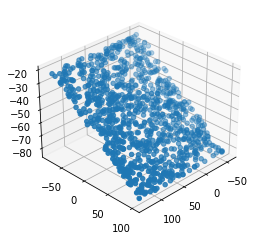

In [13]:
# randomly select some points visualize

indice = np.random.choice(len(ys), 1000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(patient_coords[indice, 0], patient_coords[indice, 1], patient_coords[indice, 2])
ax.view_init(elev=30, azim=45)